In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter

/home/anand/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{(0, 1): Text(0.7499999888241293, 0.433012741974907, '1.0'),
 (0, 5): Text(0.7499999590218074, -0.43301269296576733, '1.0'),
 (1, 2): Text(-2.9802321943606103e-08, 0.8660254296429223, '1.0'),
 (2, 3): Text(-0.7500000037252903, 0.43301266846119746, '1.0'),
 (3, 4): Text(-0.7499999292194854, -0.43301273667715495, '1.0'),
 (4, 5): Text(1.4901160971803051e-08, -0.8660254104361045, '1.0')}

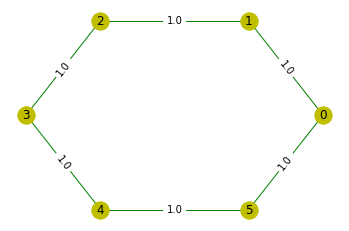

In [2]:
n     = 6
V     = np.arange(0,n,1)
E     =[(0,1,1.0),(1,2,1.0),(2,3,1.0), (3,4,1.0), (5,4,1.0), (5,0,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))
labels = nx.get_edge_attributes(G,'weight')

nx.draw(G,with_labels=True, pos=nx.circular_layout(G), node_color='y', edge_color='g')
nx.draw_networkx_edge_labels(G,nx.circular_layout(G),edge_labels=labels)

In [3]:
# import the predefined library
import os 
os.path.abspath(os.curdir)
os.path.sys.path.append('../predefined_problems/')

import  max_ind_set as mx_ind_set
import numpy as np

hamiltonian = mx_ind_set.max_ind_set(1, G)

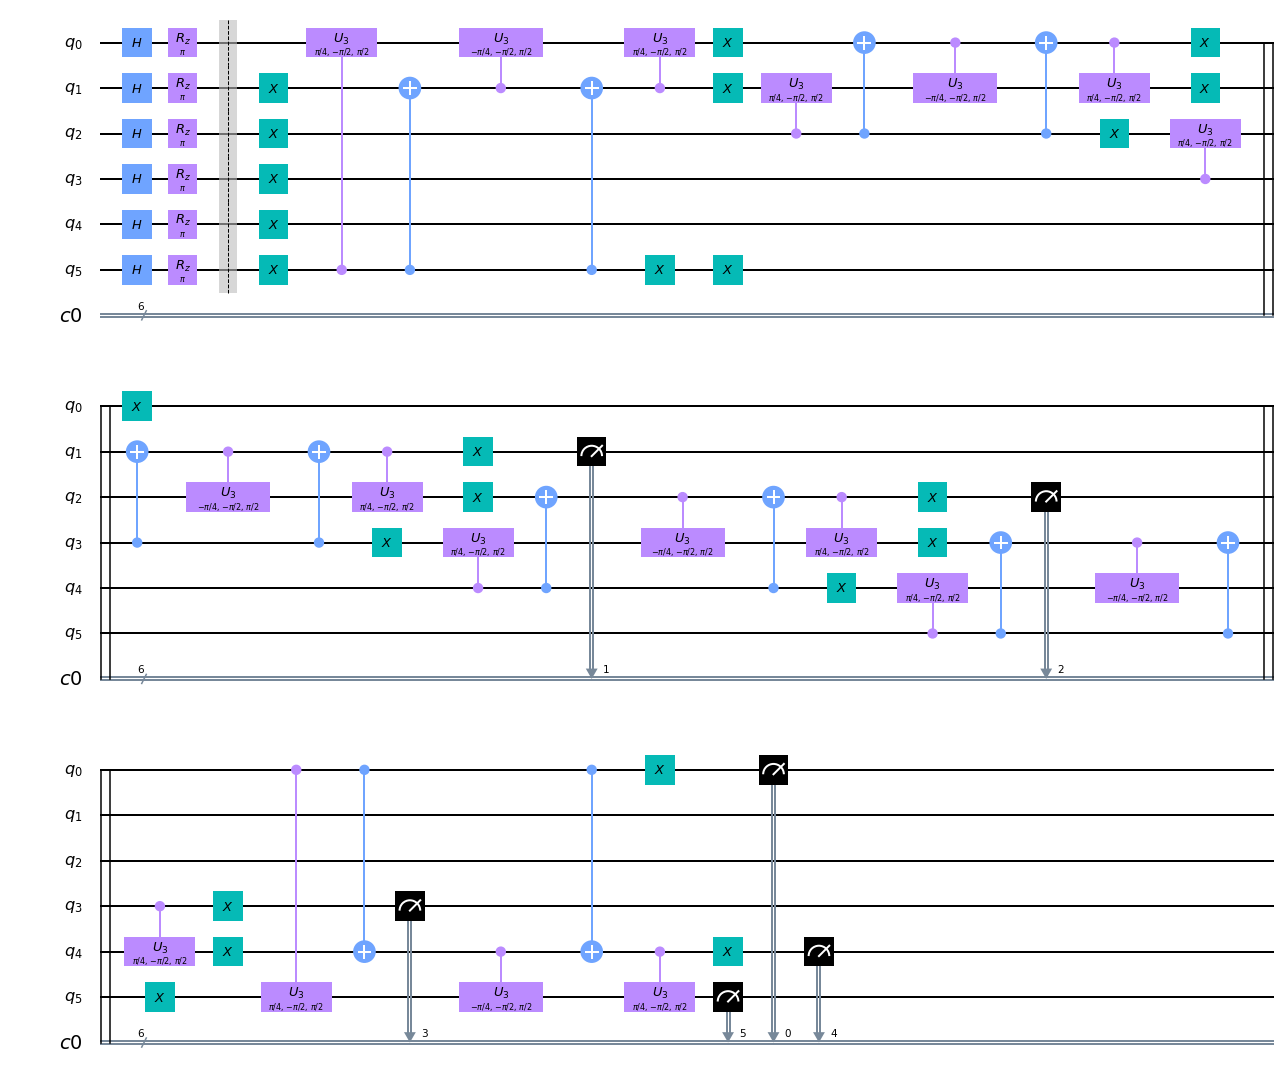

In [4]:
hyperparams = [np.pi, np.pi/2]
hamiltonian.generate_quantumCircuit(G,hyperparams=hyperparams)

In [5]:
print(hamiltonian.phse_ham.get_qubitMap(), hamiltonian.circuit.depth())

from skopt import gp_minimize
kwargs = { 'dimensions':[(0, 2*np.pi), (0, np.pi)]}


opt_hyperparams = hamiltonian.run_QAOA(gp_minimize, **kwargs)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5} 36


In [6]:
hamiltonian.generate_quantumCircuit(G, opt_hyperparams)
res = hamiltonian.run_circuit()

backend setup: Complete running circuit
Simulation: Complete!
Expectation Value : 3.4560546875


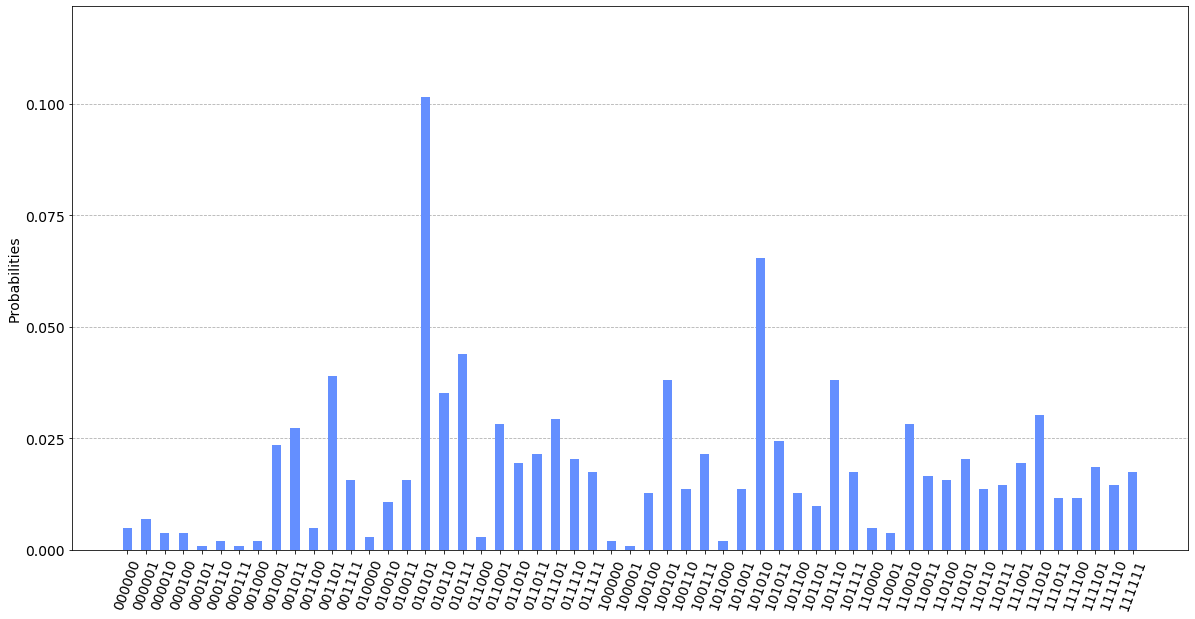

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(res.get_counts(),figsize = (20,10),bar_labels = False)